# Catastrophe du titanic 

Le but de l'étude est de prédire si un passager survit ou non au nauffrage du titanic. (concours kaggle)  
Nous avons en entrée deux programmes :  
- Un jeu de données train sur lequel nous allons apprendre le modèle (891 passagers) 
- Un jeu de données test sur lequel nous allons tester le modèle (418 passagers)

### Importation des packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from statsmodels.tools import add_constant

### Importation des données 

In [2]:
train = pd.read_csv('/Users/lucieguillaumin/Documents/Programmation personnelle/Catastrophe du titanic/2.Input/train.csv')

test = pd.read_csv('/Users/lucieguillaumin/Documents/Programmation personnelle/Catastrophe du titanic/2.Input/test.csv')

### Visualisation des données 

In [3]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Nombre de passagers ayant survécu dans le jeu de données train
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Statistiques descriptives sur les variables 

In [6]:
#Répartition du nombre de frères et soeurs 
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [7]:
# Répartition du nombre parents/enfants à bord
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [8]:
#Répartition du sex 
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
#Stats desc sur la variable age 
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
#Répartition des classes
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

On a : 
- 216 passagers en première classe
- 184 en seconde  
- 491 en troisème

In [11]:
#Répartition du prix du ticket 
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [12]:
#Répartition de la porte d'embarquement 
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Nettoyage du jeu de données train

In [13]:
#Valeurs manquantes ?
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


On remarque qu'il y a 177 valeurs manquantes pour l'âge. Pour cela, nous allons remplacer ces valeurs manquantes par la moyenne des âges renseignées : 29ans.  
Pour les cabines, nous laissons comme ca. En effet, nous allons créer une nouvelle variable pour savoir si le passagers avait une cabine ou non.  
Pour le point d'embarquement, nous choisissons de remplacer les NaN par S, qui est le point d'embarquement le plus fréquent.

In [14]:
train2 = train

#Age NaN
train2.Age = train2.Age.fillna(29)

#Point d'embarquement NaN
train2.Embarked = train2.Embarked.fillna('S')

In [15]:
print(train2.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [16]:
#On transforme la variable Pclass qui possède 3 modalités en 3 variables binaires
train2 = pd.get_dummies(train2, columns = ['Pclass'])

In [17]:
#On transforme la variable Embarked qui possède 3 modalités en 3 variables binaires 

train2 = pd.get_dummies(train2, columns = ['Embarked'])

In [18]:
#On transforme la variable sex en 2 variables binaires 

train2 = pd.get_dummies(train2, columns = ['Sex'])

In [19]:
#On va maintenant transformer la variable Cabin qui donne le numéro de la cabine
#On va la transformer en une variable binaire Cabine pour savoir si le passager a une cabine ou non
x = train2.Cabin
x = x.fillna(0)
x = np.array(x)
y = np.where((x == 0),0,1)

train2 = train2.assign(Cabine = y)

train2.drop(columns = ['Cabin'], inplace = True)

In [20]:
train2.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabine
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,0,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,0,1,1,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,0,1,0,1,0


### Nettoyage du jeu de données test

In [21]:
#Valeurs manquantes ?
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [22]:
test.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [23]:
test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [24]:
test2 = test

#Age NaN
test2.Age = test2.Age.fillna(30)

test2.Fare = test2.Fare.fillna(35)

In [25]:
print(test2.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [26]:
#On transforme la variable Pclass qui possède 3 modalités en 3 variables binaires
test2 = pd.get_dummies(test2, columns = ['Pclass'])

#On transforme la variable Embarked qui possède 3 modalités en 3 variables binaires 
test2 = pd.get_dummies(test2, columns = ['Embarked'])

#On transforme la variable sex en 2 variables binaires 
test2 = pd.get_dummies(test2, columns = ['Sex'])

#On va maintenant transformer la variable Cabin qui donne le numéro de la cabine
#On va la transformer en une variable binaire Cabine pour savoir si le passager a une cabine ou non
x = test2.Cabin
x = x.fillna(0)
x = np.array(x)
y = np.where((x == 0),0,1)

test2 = test2.assign(Cabine = y)
test2.drop(columns = ['Cabin'], inplace = True)

In [27]:
test2

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabine
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,0,1,0,1,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1,0,0,1,1,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,0,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,0,1,0,0,1,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",30.0,0,0,A.5. 3236,8.0500,0,0,1,0,0,1,0,1,0
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,1,0,0,1,0,0,1,0,1
415,1307,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,0,1,0,0,1,0,1,0
416,1308,"Ware, Mr. Frederick",30.0,0,0,359309,8.0500,0,0,1,0,0,1,0,1,0


On cherche à prédire une variable binaire : si le passager a survécu (1) ou non (0).  
Pour cela, nous allons commencer par une analyse de corrélation entre la variable 'Survived' et les autres.  

## Analyse de corrélation

In [28]:
train_corr = train2.corr()
train_corr

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabine
PassengerId,1.000000,-0.005007,0.033632,-0.057527,-0.001652,0.012658,0.034303,-0.000086,-0.029486,-0.001205,-0.033606,0.022204,-0.042939,0.042939,0.019919
Survived,-0.005007,1.000000,-0.067814,-0.035322,0.081629,0.257307,0.285904,0.093349,-0.322308,0.168240,0.003650,-0.149683,0.543351,-0.543351,0.316912
Age,0.033632,-0.067814,1.000000,-0.232978,-0.176486,0.093706,0.321661,0.010398,-0.285607,0.031303,-0.021093,-0.014149,-0.082949,0.082949,0.236162
SibSp,-0.057527,-0.035322,-0.232978,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.092548,-0.059528,-0.026354,0.068734,0.114631,-0.114631,-0.040460
Parch,-0.001652,0.081629,-0.176486,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.015790,-0.011069,-0.081228,0.060814,0.245489,-0.245489,0.036987
Fare,0.012658,0.257307,0.093706,0.159651,0.216225,1.000000,0.591711,-0.118557,-0.413333,0.269335,-0.117216,-0.162184,0.182333,-0.182333,0.482075
Pclass_1,0.034303,0.285904,0.321661,-0.054582,-0.017633,0.591711,1.000000,-0.288585,-0.626738,0.296423,-0.155342,-0.161921,0.098013,-0.098013,0.788773
Pclass_2,-0.000086,0.093349,0.010398,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,0.189980,0.064746,-0.064746,-0.172413
Pclass_3,-0.029486,-0.322308,-0.285607,0.092548,0.015790,-0.413333,-0.626738,-0.565210,1.000000,-0.153329,0.237449,-0.015104,-0.137143,0.137143,-0.539291
Embarked_C,-0.001205,0.168240,0.031303,-0.059528,-0.011069,0.269335,0.296423,-0.125416,-0.153329,1.000000,-0.148258,-0.782742,0.082853,-0.082853,0.208528


In [29]:
train_quant = train.filter(['Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare'])
train_quant.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


<AxesSubplot:>

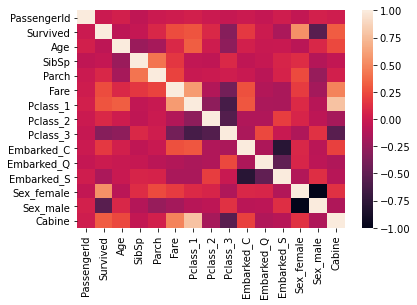

In [30]:
sb.heatmap(train_corr)

## Régression logistique 

On souhaite expliquer la variable binaire Survived.

In [31]:
#Variable à expliquer 
y = train2.Survived

#Variables explicatives
X = train2.copy()
X.drop(columns = ['Survived', 'PassengerId', 'Name', 'Ticket'], inplace = True)

In [32]:
#Pour la régression logistique avec le pakcage statsmodel, ne prend pas de constante il faut donc l'ajouter
x_stat = sm.add_constant(X)

#Ajustement du modèle
model = sm.Logit(y, x_stat)
result = model.fit()

         Current function value: 0.435301
         Iterations: 35


/Users/lucieguillaumin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
#Résultats du modèle 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                           10
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                  0.3463
Time:                        15:59:29   Log-Likelihood:                -387.85
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.394e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5859   6.42e+06   9.12e-08      1.000   -1.26e+07    1.26e+07
Age           -0.0388      0.008     -4.880      0.000      -0.054      -0.023
SibSp         -0.3174      0.111     -2.870      0.004      -0.534      -0.101
Parch         -0.1188      0.120     -0.987      0.324      -0.355       0.117
Fare           0.0020      0.002      0.799      0.424      -0.003       0.007
Pclass_1       0.7357   1.32e+07   5.58e-08      1.000   -2.59e+07    2.59e+07
Pclass_2       0.5176   1.36e+07    3.8e-08      1.000   -2.67e+07    2.67e+07
Pclass_3      -0.6674   1.38e+07  -4.83e-08      1.000   -2.71e+07    2.71e+07
Embarked_C     0.3812        nan        nan        nan         nan         nan
Embarked_Q     0.3072        nan        nan        nan         nan         nan
Embarked_S    -0.1024        nan        nan        nan         nan         nan
Sex_female     1.6493   7.61e+06   2.17e-07      1.000   -1.49e+07    1.49e+07
Sex_male      -1.0633   7.61e+06   -1.4e-07      1.000   -1.49e+07    1.49e+07
Cabine         0.9849      0.335      2.939      0.003       0.328       1.642
==============================================================================
"""

### Interprétation 
On voit que les variables : Age, SibSp, Parch, Pclass_3, Embarked_S et Sex_male influent négativement sur le fait de survivre ou non.

In [34]:
#valeurs estimées par la régression en resubstitution
print(result.fittedvalues)

0     -2.404834
1      2.683664
2      0.471208
3      2.280891
4     -2.590692
         ...   
886   -1.085267
887    3.174382
888   -0.169800
889    0.673511
890   -2.065140
Length: 891, dtype: float64


In [35]:
#Voici les coefficients estimés
print(result.params)

const         0.585946
Age          -0.038836
SibSp        -0.317439
Parch        -0.118761
Fare          0.001962
Pclass_1      0.735742
Pclass_2      0.517616
Pclass_3     -0.667410
Embarked_C    0.381174
Embarked_Q    0.307204
Embarked_S   -0.102429
Sex_female    1.649286
Sex_male     -1.063337
Cabine        0.984858
dtype: float64


In [36]:
#la règle d'affectation consiste à confronter le LOGIT à la valeur seuil 0
predResub = np.where(result.fittedvalues > 0, 1, 0)
print(predResub)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0
 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 

In [37]:
#on peut en déduire la matrice de confusion
print(pd.crosstab(y,predResub))

col_0       0    1
Survived          
0         476   73
1          95  247


In [38]:
#matrice de confusion en resubstitution directement fournie par l'outil
print(result.pred_table())

[[476.  73.]
 [ 95. 247.]]


In [39]:
#R2
print(result.prsquared)

0.3463088022243047


### Prédiction à l'aide du jeu de données Test

In [40]:
X_test = test2.copy()
X_test.drop(columns = ['PassengerId', 'Name', 'Ticket'], inplace = True)
x_stat_test = sm.add_constant(X_test)

In [41]:
x_stat_test

,const,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabine
0,1.0,34.5,0,0,7.8292,0,0,1,0,1,0,0,1,0
1,1.0,47.0,1,0,7.0000,0,0,1,0,0,1,1,0,0
2,1.0,62.0,0,0,9.6875,0,1,0,0,1,0,0,1,0
3,1.0,27.0,0,0,8.6625,0,0,1,0,0,1,0,1,0
4,1.0,22.0,1,1,12.2875,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,30.0,0,0,8.0500,0,0,1,0,0,1,0,1,0
414,1.0,39.0,0,0,108.9000,1,0,0,1,0,0,1,0,1
415,1.0,38.5,0,0,7.2500,0,0,1,0,0,1,0,1,0
416,1.0,30.0,0,0,8.0500,0,0,1,0,0,1,0,1,0


In [42]:
#calcul de la prédiction sur l'échantillon test
predProbaSm = result.predict(x_stat_test)

In [43]:
#à l'évidence nous avons les probabilités d'affectation
print(predProbaSm.describe())

count    418.000000
mean       0.399124
std        0.307166
min        0.011533
25%        0.114334
50%        0.286653
75%        0.673741
max        0.970350
dtype: float64


In [44]:
#convertir en prédiction brute
predSm = np.where(predProbaSm > 0.5, 1, 0)
print(np.unique(predSm,return_counts=True))

(array([0, 1]), array([260, 158]))


In [45]:
#transformer en matrice Numpy
#mcSmNumpy = mcSm.values

#taux de reconnaissance
#accSm = np.sum(np.diagonal(mcSmNumpy))/np.sum(mcSmNumpy)
#print("Taux de reconnaissance : %.4f" % (accSm))
#taux d'erreur
#errSm = 1.0 - accSm
#print("Taux d'erreur' : %.4f" % (errSm))

In [46]:
predSm

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
data_pred = test2.assign(Prediction = predSm)
data_pred

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabine,Prediction
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,0,1,0,1,0,0,1,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1,0,0,1,1,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,0,0,1,0,0,1,0,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,0,1,0,0,1,0,1,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",30.0,0,0,A.5. 3236,8.0500,0,0,1,0,0,1,0,1,0,0
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,1,0,0,1,0,0,1,0,1,1
415,1307,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,0,1,0,0,1,0,1,0,0
416,1308,"Ware, Mr. Frederick",30.0,0,0,359309,8.0500,0,0,1,0,0,1,0,1,0,0


In [48]:
data_pred.query('Prediction==1')

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabine,Prediction
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1,0,0,1,1,0,0,1
6,898,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,0,0,1,0,1,0,1,0,0,1
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,0,0,1,1,0,0,1,0,0,1
12,904,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",23.0,1,0,21228,82.2667,1,0,0,0,0,1,1,0,1,1
14,906,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",47.0,1,0,W.E.P. 5734,61.1750,1,0,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,"Peacock, Miss. Treasteall",3.0,1,1,SOTON/O.Q. 3101315,13.7750,0,0,1,0,0,1,1,0,0,1
410,1302,"Naughton, Miss. Hannah",30.0,0,0,365237,7.7500,0,0,1,0,1,0,1,0,0,1
411,1303,"Minahan, Mrs. William Edward (Lillian E Thorpe)",37.0,1,0,19928,90.0000,1,0,0,0,1,0,1,0,1,1
412,1304,"Henriksson, Miss. Jenny Lovisa",28.0,0,0,347086,7.7750,0,0,1,0,0,1,1,0,0,1


### Exportation des résultats en csv

In [49]:
#data_pred.to_csv('/Users/lucieguillaumin/Documents/Programmation personnelle/Catastrophe du titanic/4.Output/gender_submission.csv')

Après soumission de nos prédictions, on se rend compte que la prédiction est bonne que pour 70% des passagers.  
Nous allons reprendre notre modèle et regarder plus en détails quelles variables influents.

In [50]:
#Résultats du modèle 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                           10
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                  0.3463
Time:                        15:59:29   Log-Likelihood:                -387.85
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.394e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5859   6.42e+06   9.12e-08      1.000   -1.26e+07    1.26e+07
Age           -0.0388      0.008     -4.880      0.000      -0.054      -0.023
SibSp         -0.3174      0.111     -2.870      0.004      -0.534      -0.101
Parch         -0.1188      0.120     -0.987      0.324      -0.355       0.117
Fare           0.0020      0.002      0.799      0.424      -0.003       0.007
Pclass_1       0.7357   1.32e+07   5.58e-08      1.000   -2.59e+07    2.59e+07
Pclass_2       0.5176   1.36e+07    3.8e-08      1.000   -2.67e+07    2.67e+07
Pclass_3      -0.6674   1.38e+07  -4.83e-08      1.000   -2.71e+07    2.71e+07
Embarked_C     0.3812        nan        nan        nan         nan         nan
Embarked_Q     0.3072        nan        nan        nan         nan         nan
Embarked_S    -0.1024        nan        nan        nan         nan         nan
Sex_female     1.6493   7.61e+06   2.17e-07      1.000   -1.49e+07    1.49e+07
Sex_male      -1.0633   7.61e+06   -1.4e-07      1.000   -1.49e+07    1.49e+07
Cabine         0.9849      0.335      2.939      0.003       0.328       1.642
==============================================================================
"""

On cherche donc à savoir si nos coefficients sont significatifs ou non.  
Pour cela, on regarde la colonne $P>|z|$.  
On teste donc :  
- $H_0$ : "le coefficient peu être considéré comme nul"  
- $H_1$ : "le coefficient est significatif"  

Ce test permet de savoir si nos coefficients sont significatifs ou non, c'est à dire si la variable explicative associée joue un rôle dans la détermination de si le passager survit ou non.  

En prenant un seuil de 5%, on remarque que pour Parch, Fare sont strictement supérieures à  0.05  : dans ce cas on accepte $H_0$. On peut donc supprimer de notre modèle les variables Parch et Fare qui ne jouent pas sur le fait qu'un passager survive ou non.

### Régression logistique sans les variables Parch et Fare 

In [51]:
#Variable à expliquer 
y_2 = train2.Survived

#Variables explicatives
X_2 = train2.copy()
X_2.drop(columns = ['Survived', 'PassengerId', 'Name', 'Ticket', 'Parch', 'Fare'], inplace = True)

In [52]:
#Pour la régression logistique avec le pakcage statsmodel, ne prend pas de constante il faut donc l'ajouter
x_stat2 = sm.add_constant(X_2)

#Ajustement du modèle
model2 = sm.Logit(y_2, x_stat2)
result2 = model2.fit()

#Résultats du modèle 
result2.summary()

Optimization terminated successfully.
         Current function value: 0.436089
         Iterations 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Fri, 25 Jun 2021   Pseudo R-squ.:                  0.3451
Time:                        15:59:29   Log-Likelihood:                -388.56
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.701e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6092        nan        nan        nan         nan         nan
Age           -0.0389      0.008     -4.917      0.000      -0.054      -0.023
SibSp         -0.3340      0.105     -3.170      0.002      -0.541      -0.127
Pclass_1       0.8312   3.82e+06   2.18e-07      1.000   -7.49e+06    7.49e+06
Pclass_2       0.4951   3.82e+06    1.3e-07      1.000   -7.49e+06    7.49e+06
Pclass_3      -0.7172   3.82e+06  -1.88e-07      1.000   -7.49e+06    7.49e+06
Embarked_C     0.3933        nan        nan        nan         nan         nan
Embarked_Q     0.3326        nan        nan        nan         nan         nan
Embarked_S    -0.1167        nan        nan        nan         nan         nan
Sex_female     1.6460   2.12e+06   7.76e-07      1.000   -4.16e+06    4.16e+06
Sex_male      -1.0369   2.12e+06  -4.89e-07      1.000   -4.16e+06    4.16e+06
Cabine         0.9680      0.331      2.928      0.003       0.320       1.616
==============================================================================
"""

In [53]:
#R2
print(result2.prsquared)

0.34512441052717235


#### Prédiction

In [54]:
X_test2 = test2.copy()
X_test2.drop(columns = ['PassengerId', 'Name', 'Ticket','Parch', 'Fare'], inplace = True)
x_stat_test2 = sm.add_constant(X_test2)

In [55]:
#calcul de la prédiction sur l'échantillon test
predProbaSm2 = result2.predict(x_stat_test2)

In [56]:
#convertir en prédiction brute
predSm2 = np.where(predProbaSm2 > 0.5, 1, 0)
print(np.unique(predSm2,return_counts=True))

(array([0, 1]), array([260, 158]))


In [57]:
data_pred2 = test2.assign(Prediction = predSm2)
data_pred2

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabine,Prediction
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,0,1,0,1,0,0,1,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1,0,0,1,1,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,0,0,1,0,0,1,0,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,0,1,0,0,1,0,1,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",30.0,0,0,A.5. 3236,8.0500,0,0,1,0,0,1,0,1,0,0
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,1,0,0,1,0,0,1,0,1,1
415,1307,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,0,1,0,0,1,0,1,0,0
416,1308,"Ware, Mr. Frederick",30.0,0,0,359309,8.0500,0,0,1,0,0,1,0,1,0,0


In [58]:
data_pred.query('Prediction==1')

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabine,Prediction
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1,0,0,1,1,0,0,1
6,898,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,0,0,1,0,1,0,1,0,0,1
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,0,0,1,1,0,0,1,0,0,1
12,904,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",23.0,1,0,21228,82.2667,1,0,0,0,0,1,1,0,1,1
14,906,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",47.0,1,0,W.E.P. 5734,61.1750,1,0,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,"Peacock, Miss. Treasteall",3.0,1,1,SOTON/O.Q. 3101315,13.7750,0,0,1,0,0,1,1,0,0,1
410,1302,"Naughton, Miss. Hannah",30.0,0,0,365237,7.7500,0,0,1,0,1,0,1,0,0,1
411,1303,"Minahan, Mrs. William Edward (Lillian E Thorpe)",37.0,1,0,19928,90.0000,1,0,0,0,1,0,1,0,1,1
412,1304,"Henriksson, Miss. Jenny Lovisa",28.0,0,0,347086,7.7750,0,0,1,0,0,1,1,0,0,1


On remarque que la prédiction est la même, on choisit donc de faire cette prédiction à l'aide d'un autre modèle.